<a href="https://colab.research.google.com/github/MijulSaxena/Retail-Sales-Prediction-Regression-Project/blob/main/Capstone_Project_Supervised_ML_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**
# **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

In [ ]:
# importing numpy, pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading in the Play Store data and User Reviews data from CSV files
rossmann_store_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store = pd.read_csv('/content/drive/MyDrive/Store.csv')

<ipython-input-2-d22a462c249e>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_store_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


In [ ]:
# Rossmann Store Dataset First Look
rossmann_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Store Dataset First Look
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Checking columns of Rossmann store dataset
rossmann_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Checking columns of Store dataset
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Checking information of rossmann store and store datasets
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Missing values in store dataset
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
data = rossmann_store_data.merge(store, on = 'Store',how = 'left')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

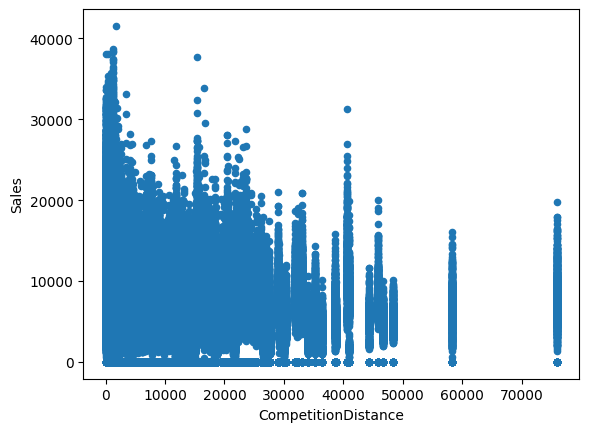

In [ ]:
data.plot(kind= 'scatter', x='CompetitionDistance',y = 'Sales')
plt.show()

In [ ]:
data.Promo2.value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [ ]:
data['Promo2SinceWeek'].fillna(value = 'NaN',inplace = True)
data['Promo2SinceYear'].fillna(value = 'NaN',inplace = True)
data['PromoInterval'].fillna(value = 'NaN',inplace = True)
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

In [ ]:
data[data['CompetitionDistance'].isna()].isna().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth    2642
CompetitionOpenSinceYear     2642
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
dtype: int64

In [ ]:
data['CompetitionDistance'].value_counts()

250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
3920.0       758
4460.0       758
13090.0      758
5890.0       758
12870.0      758
Name: CompetitionDistance, Length: 654, dtype: int64

In [ ]:
data.dropna(subset = ['CompetitionDistance'],inplace = True)
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

In [ ]:
data.shape

(1014567, 18)

In [ ]:
# Filling null values with mode
data['CompetitionOpenSinceMonth'].fillna(value=data['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
data['CompetitionOpenSinceYear'].fillna(value=data['CompetitionOpenSinceYear'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Preprocessing

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
data.loc[data['Promo2'] == 0, ['Promo2SinceWeek','Promo2SinceYear']] = -1
data[['Promo2SinceWeek','Promo2SinceYear']] = data[['Promo2SinceWeek','Promo2SinceYear']].astype(int)
data[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = data[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].astype(int)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,-1,-1,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,-1,-1,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,-1,-1,NaN


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.loc[data['Promo2'] == 0,'Promo2Date'] = data.Date
dates = data.loc[data['Promo2'] == 1, 'Promo2SinceYear']*100 + data.loc[data['Promo2'] == 1, 'Promo2SinceWeek']
data.loc[data['Promo2'] == 1,'Promo2Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,-1,-1,NaN,2015-07-31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2010-04-04
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-10
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,-1,-1,NaN,2015-07-31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,-1,-1,NaN,2015-07-31


In [ ]:
data['CompetitionDate'] = str(1)
data['CompetitionDate'] = data[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionDate']].astype(str).agg('-'.join, axis = 1)
data['CompetitionDate'] = pd.to_datetime(data['CompetitionDate'])
data.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'], axis= 1, inplace = True)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Date,CompetitionDate
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2015-07-31,2008-09-01
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2010-04-04,2007-11-01
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2011-04-10,2006-12-01
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,NaN,2015-07-31,2009-09-01
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,NaN,2015-07-31,2015-04-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014567 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1014567 non-null  int64         
 1   DayOfWeek            1014567 non-null  int64         
 2   Date                 1014567 non-null  datetime64[ns]
 3   Sales                1014567 non-null  int64         
 4   Customers            1014567 non-null  int64         
 5   Open                 1014567 non-null  int64         
 6   Promo                1014567 non-null  int64         
 7   StateHoliday         1014567 non-null  object        
 8   SchoolHoliday        1014567 non-null  int64         
 9   StoreType            1014567 non-null  object        
 10  Assortment           1014567 non-null  object        
 11  CompetitionDistance  1014567 non-null  float64       
 12  Promo2               1014567 non-null  int64         
 1

In [ ]:
data['CompetitionDuration'] = data['Date'] - data['CompetitionDate']
data['Promo2Duration'] = data['Date'] - data['Promo2Date']
data['CompetitionDuration']  = data['CompetitionDuration'].dt.days
data['Promo2Duration']  = data['Promo2Duration'].dt.days
data.loc[data['CompetitionDuration'] < 0,'CompetitionDuration'] = -1
data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Date,CompetitionDate,CompetitionDuration,Promo2Duration
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1,"Jan,Apr,Jul,Oct",2013-08-11,2014-06-01,-1,-222
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0,NaN,2013-01-01,2006-04-01,2467,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,NaN,2013-01-01,2013-09-01,-1,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,NaN,2013-01-01,2013-09-01,-1,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2012-06-03,2013-09-01,-1,212


In [ ]:
data.loc[data['Promo2Duration'] < 0,'Promo2Duration'] = -1
data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Date,CompetitionDate,CompetitionDuration,Promo2Duration
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1,"Jan,Apr,Jul,Oct",2013-08-11,2014-06-01,-1,-1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0,NaN,2013-01-01,2006-04-01,2467,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,NaN,2013-01-01,2013-09-01,-1,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,NaN,2013-01-01,2013-09-01,-1,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2012-06-03,2013-09-01,-1,212


In [ ]:
data.drop(['CompetitionDate','Promo2Date'], axis= 1, inplace = True)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionDuration,Promo2Duration
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2524,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2829,1944
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",3164,1573
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,NaN,2159,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,NaN,121,0


In [ ]:
features = ['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo2','PromoInterval','CompetitionDuration','Promo2Duration']
X = data[features]
Y = data['Sales']

In [ ]:
X.shape

(1014567, 13)

In [ ]:
Y.shape

(1014567,)

In [ ]:
X = pd.get_dummies(X)
X.head()

,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionDuration,Promo2Duration,StateHoliday_0,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_NaN
0,5,555,1,1,1,1270.0,0,2524,0,0,...,0,1,0,1,0,0,0,0,0,1
1,5,625,1,1,1,570.0,1,2829,1944,0,...,0,0,0,1,0,0,0,1,0,0
2,5,821,1,1,1,14130.0,1,3164,1573,0,...,0,0,0,1,0,0,0,1,0,0
3,5,1498,1,1,1,620.0,0,2159,0,0,...,0,1,0,0,0,1,0,0,0,1
4,5,559,1,1,1,29910.0,0,121,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
x = StandardScaler().fit_transform(X[['Customers','CompetitionDistance','CompetitionDuration',	'Promo2Duration']])
X_scaled = X
X_scaled[['Customers','CompetitionDistance','CompetitionDuration',	'Promo2Duration']] = x
X_scaled.head()

,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionDuration,Promo2Duration,StateHoliday_0,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_NaN
0,5,-0.169168,1,1,1,-0.539198,0,0.590907,-0.687593,0,...,0,1,0,1,0,0,0,0,0,1
1,5,-0.018516,1,1,1,-0.629927,1,0.747359,2.682041,0,...,0,0,0,1,0,0,0,1,0,0
2,5,0.403309,1,1,1,1.127616,1,0.919198,2.038968,0,...,0,0,0,1,0,0,0,1,0,0
3,5,1.860326,1,1,1,-0.623446,0,0.403679,-0.687593,0,...,0,1,0,0,0,1,0,0,0,1
4,5,-0.160559,1,1,1,3.172897,0,-0.641723,-0.687593,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2,
random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9002192493025001

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1216.0242195530195